In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the datasets with date parsing
change_energy_consumption = pd.read_csv('change-energy-consumption.csv')
consumption = pd.read_csv('CONSUMPTION.csv')
electricity_generation = pd.read_csv('electricity-generation.csv')
global_energy_substitution = pd.read_csv('global-energy-substitution.csv')
primary_energy_cons = pd.read_csv('primary-energy-cons.csv')
production = pd.read_csv('PRODUCTION.csv')
renewable_share = pd.read_csv('share-of-final-energy-consumption-from-renewable-sources.csv')

# Parse dates in 'consumption' and 'production' datasets
consumption['Date'] = pd.to_datetime(consumption['Date'], format='%d-%m-%Y', dayfirst=True)
production['Date'] = pd.to_datetime(production['Date'], format='%d-%m-%Y', dayfirst=True)


FileNotFoundError: [Errno 2] No such file or directory: 'change-energy-consumption.csv'

In [ ]:
# Drop 'Entity' and 'Code' columns
datasets = [change_energy_consumption, consumption, electricity_generation, global_energy_substitution, primary_energy_cons, production, renewable_share]
for i, dataset in enumerate(datasets):
    if 'Entity' in dataset.columns:
        dataset.drop(['Entity'], axis=1, inplace=True)
    if 'Code' in dataset.columns:
        dataset.drop(['Code'], axis=1, inplace=True)


In [ ]:
# Inspect the datasets
datasets = [change_energy_consumption, consumption, electricity_generation, global_energy_substitution, primary_energy_cons, production, renewable_share]
for i, dataset in enumerate(datasets):
    print(f"Dataset {i+1} Info:")
    print(dataset.info())
    print(dataset.head())
    print("\n")


Dataset 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11720 entries, 0 to 11719
Data columns (total 2 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Year                                             11720 non-null  int64  
 1   Annual change in primary energy consumption (%)  11720 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 183.3 KB
None
   Year  Annual change in primary energy consumption (%)
0  1981                                        12.663031
1  1982                                         6.505477
2  1983                                        22.333790
3  1984                                         0.462401
4  1985                                        -2.365375


Dataset 2 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 6 columns):
 #   Column                              No

In [ ]:
# Handle missing values (basic approach)
for i, dataset in enumerate(datasets):
    print(f"Missing values in Dataset {i+1}:")
    print(dataset.isnull().sum())
    print("\n")
    # Example: Fill missing values with the median for numeric columns
    for col in dataset.select_dtypes(include=['float64', 'int64']).columns:
        dataset[col].fillna(dataset[col].median(), inplace=True)


Missing values in Dataset 1:
Year                                               0
Annual change in primary energy consumption (%)    0
dtype: int64


Missing values in Dataset 2:
Date                                  0
Total Fossil Fuels Consumption        0
Nuclear Electric Power Consumption    0
Total Renewable Energy Consumption    0
Primary Energy Net Exports            0
Total Primary Energy Consumption      0
dtype: int64


Missing values in Dataset 3:
Year                            0
Electricity generation - TWh    0
dtype: int64


Missing values in Dataset 4:
Year                                             0
Other renewables (TWh, substituted energy)       0
Biofuels (TWh, substituted energy)               0
Solar (TWh, substituted energy)                  0
Wind (TWh, substituted energy)                   0
Hydropower (TWh, substituted energy)             0
Nuclear (TWh, substituted energy)                0
Gas (TWh, substituted energy)                    0
Oil (TWh, substit

C:\Users\subha\AppData\Local\Temp\ipykernel_21116\3500012448.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].median(), inplace=True)
C:\Users\subha\AppData\Local\Temp\ipykernel_21116\3500012448.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [ ]:
# Example: Convert 'Year' column to integer if it's not already
for dataset in datasets:
    if 'Year' in dataset.columns:
        dataset['Year'] = dataset['Year'].astype(int)


EDA

In [ ]:
# Summary statistics
for i, dataset in enumerate(datasets):
    print(f"Summary statistics for Dataset {i+1}:")
    print(dataset.describe())
    print("\n")


Summary statistics for Dataset 1:
               Year  Annual change in primary energy consumption (%)
count  11720.000000                                     11720.000000
mean    1998.381826                                         4.010610
std       14.621540                                        28.587429
min     1966.000000                                      -100.000000
25%     1987.000000                                        -0.479139
50%     1999.000000                                         2.405286
75%     2011.000000                                         6.210795
max     2023.000000                                      1553.105000


Summary statistics for Dataset 2:
                                Date  Total Fossil Fuels Consumption  \
count                            599                      599.000000   
mean   1997-12-30 04:14:49.482470784                        6.321391   
min              1973-01-31 00:00:00                        4.783910   
25%              1985

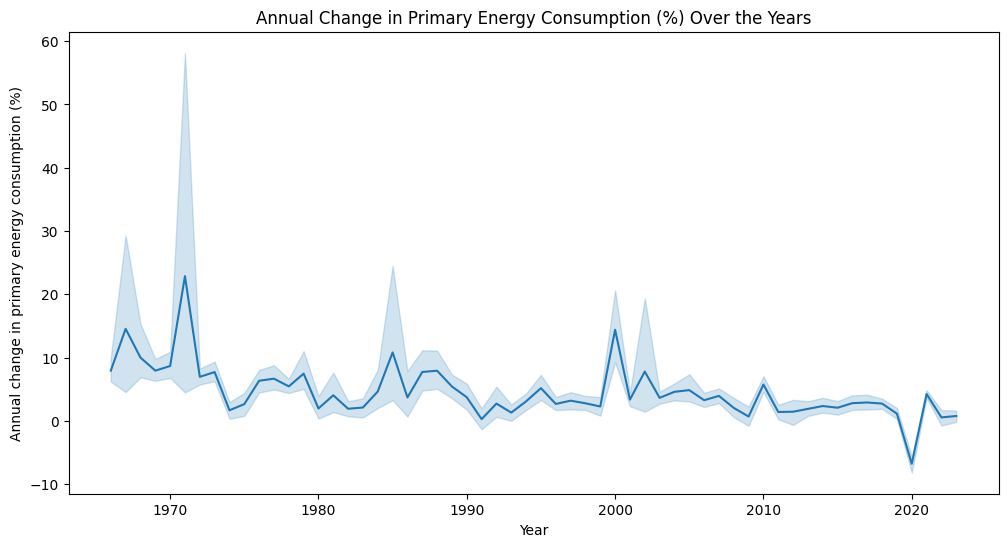

In [ ]:
# Line plot for change in primary energy consumption over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=change_energy_consumption, x='Year', y='Annual change in primary energy consumption (%)')
plt.title('Annual Change in Primary Energy Consumption (%) Over the Years')
plt.show()


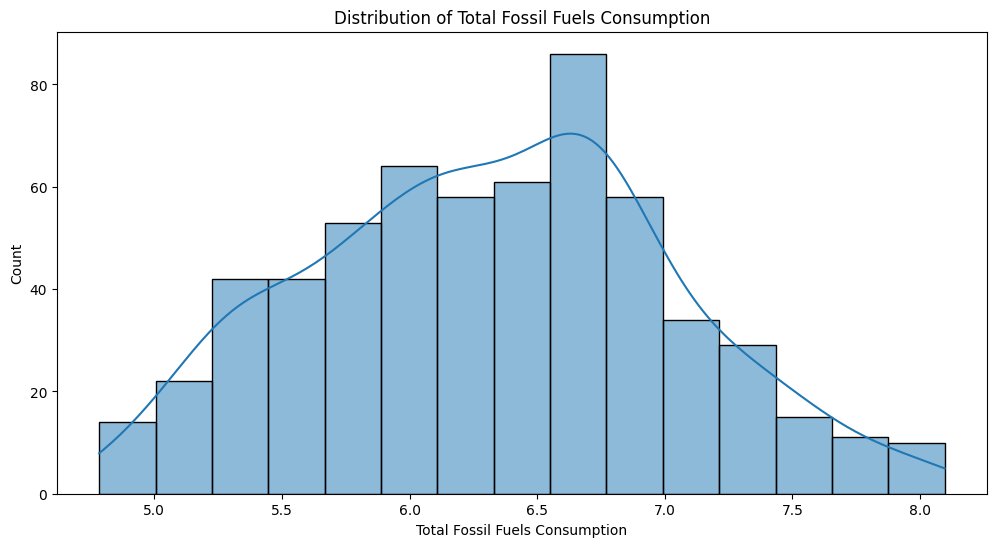

In [ ]:
# Histogram for total fossil fuels consumption
plt.figure(figsize=(12, 6))
sns.histplot(data=consumption, x='Total Fossil Fuels Consumption', kde=True)
plt.title('Distribution of Total Fossil Fuels Consumption')
plt.show()


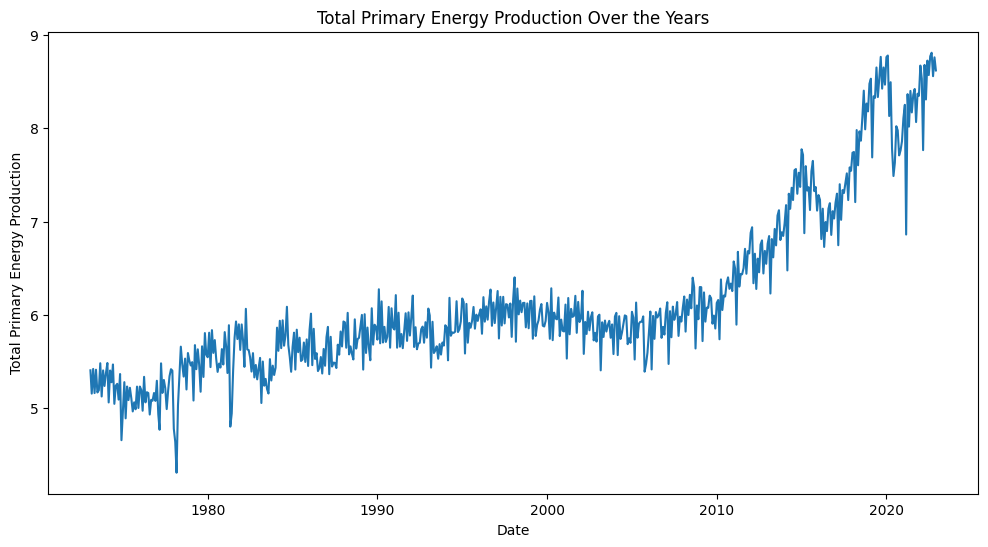

In [ ]:
# Line plot for total primary energy production over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=production, x='Date', y='Total Primary Energy Production')
plt.title('Total Primary Energy Production Over the Years')
plt.show()


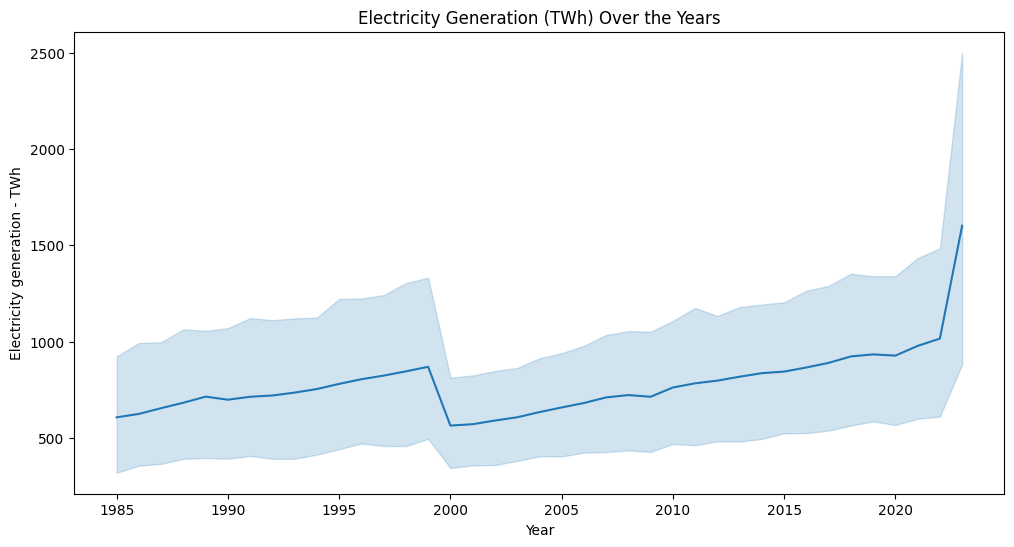

In [ ]:
# Line plot for electricity generation over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=electricity_generation, x='Year', y='Electricity generation - TWh')
plt.title('Electricity Generation (TWh) Over the Years')
plt.show()


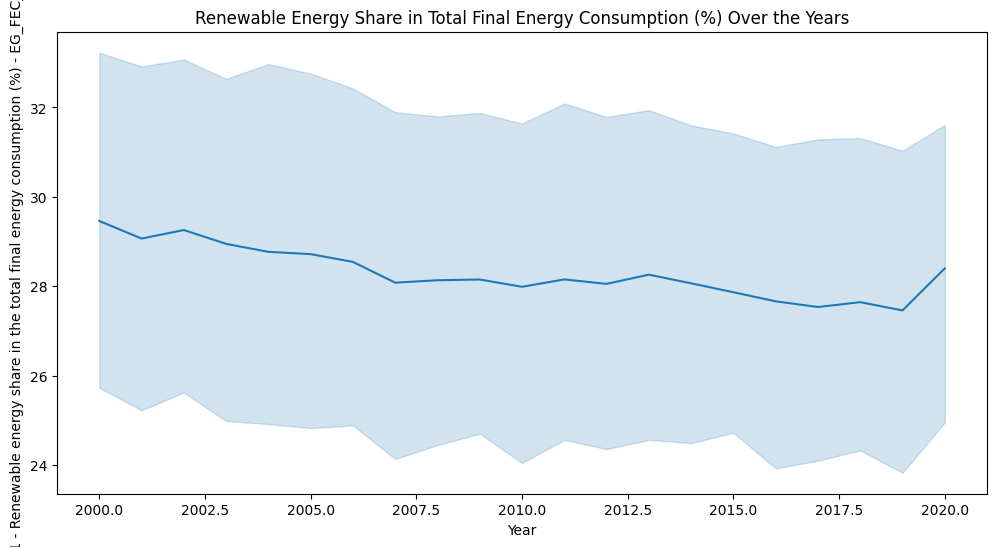

In [ ]:
# Line plot for renewable energy share in the total final energy consumption over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=renewable_share, x='Year', y='7.2.1 - Renewable energy share in the total final energy consumption (%) - EG_FEC_RNEW')
plt.title('Renewable Energy Share in Total Final Energy Consumption (%) Over the Years')
plt.show()


Machine Learning Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the consumption dataset and parse dates
consumption = pd.read_csv('CONSUMPTION.csv')
consumption['Date'] = pd.to_datetime(consumption['Date'], format='%d-%m-%Y', dayfirst=True)

# Drop 'Entity' and 'Code' columns if present
if 'Entity' in consumption.columns:
    consumption.drop(['Entity'], axis=1, inplace=True)
if 'Code' in consumption.columns:
    consumption.drop(['Code'], axis=1, inplace=True)


In [ ]:
# Load the consumption dataset and parse dates
consumption = pd.read_csv('CONSUMPTION.csv')
consumption['Date'] = pd.to_datetime(consumption['Date'], format='%d-%m-%Y', dayfirst=True)

# Drop 'Entity' and 'Code' columns if present
if 'Entity' in consumption.columns:
    consumption.drop(['Entity'], axis=1, inplace=True)
if 'Code' in consumption.columns:
    consumption.drop(['Code'], axis=1, inplace=True)


In [ ]:
# Handle missing values
consumption.fillna(consumption.median(), inplace=True)

# Extract features and target variable
X = consumption.drop(['Total Primary Energy Consumption', 'Date'], axis=1)
y = consumption['Total Primary Energy Consumption']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')
print(f'Training R2: {train_r2}')
print(f'Testing R2: {test_r2}')


Training MSE: 1.4543247782391952e-05
Testing MSE: 1.7930172683415825e-05
Training R2: 0.9999839875999325
Testing R2: 0.9999787189941463


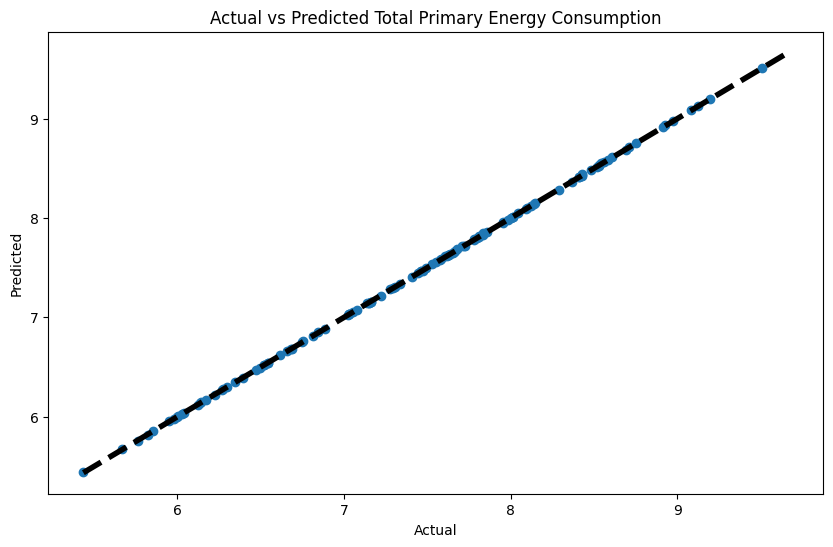

In [ ]:
# Plot actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Total Primary Energy Consumption')
plt.show()


In [ ]:
'''
Summary of Insights
Data Preparation: We loaded and prepared the consumption dataset.
Feature Engineering: We selected features and scaled them.
Train/Test Split: We split the data into training and testing sets.
Model Training: We trained a linear regression model.
Model Evaluation: We evaluated the model's performance using MSE and R2 score.
Prediction Visualization: We visualized the actual vs. predicted values.
'''

"\nSummary of Insights\nData Preparation: We loaded and prepared the consumption dataset.\nFeature Engineering: We selected features and scaled them.\nTrain/Test Split: We split the data into training and testing sets.\nModel Training: We trained a linear regression model.\nModel Evaluation: We evaluated the model's performance using MSE and R2 score.\nPrediction Visualization: We visualized the actual vs. predicted values. \n"